In [2]:
import librosa 
import numpy as np
import matplotlib.pyplot as plt

import steme.audio as audio
import steme.dataset as dataset
import steme.utils as utils

import IPython.display as ipd

2023-03-04 09:00:28.916033: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-04 09:00:29.035663: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-04 09:00:29.035679: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-04 09:00:29.060341: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-04 09:00:29.717928: W tensorflow/stream_executor/platform/de

In [3]:
librosa.util.list_examples()

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
humpback  	Glacier Bay 60-second clip humpback whale song November 2020
libri1    	Ashiel Mystery - A Detective Story, chapter 2, narrated by Garth Comira
libri2    	The Age of Chivalry / Chapter 18: Perceval / Read by Anders Lankford
libri3    	Sense and Sensibility / Chapter 18 / Jane Austen / Read by Heather Barnett
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
pistachio 	The Piano Lady - Pistachio Ice Cream Ragtime
robin     	Bird Whistling, Robin, Single, 13.wav / InspectorJ
sweetwaltz	Setuniman - Sweet Waltz
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


In [4]:
x, fs = librosa.load(librosa.example("choice"))
# you can explore further examples
# x, fs = librosa.load(librosa.example("sweetwaltz"))

In [5]:
ipd.Audio(x, rate=fs)

# Tempograms with linear axis

In [6]:
linear_axis = np.arange(30,350,1)

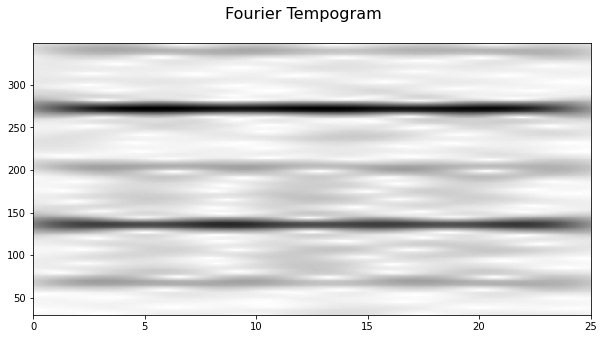

In [7]:
fT, ft, ffreqs = audio.tempogram(x=x, sr=fs, window_size_seconds=10, t_type="fourier", theta=linear_axis)

fig, ax = utils.plot_tempogram(fT, ft, ffreqs, title="Fourier Tempogram")

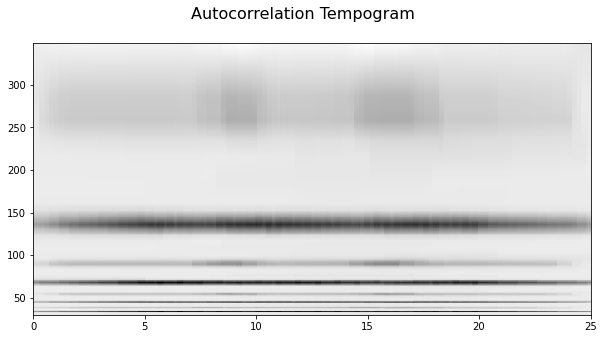

In [8]:
aT, at, afreqs = audio.tempogram(x=x, sr=fs, window_size_seconds=10, t_type="autocorrelation", theta=linear_axis)

fig, ax = utils.plot_tempogram(aT, at, afreqs, title="Autocorrelation Tempogram")

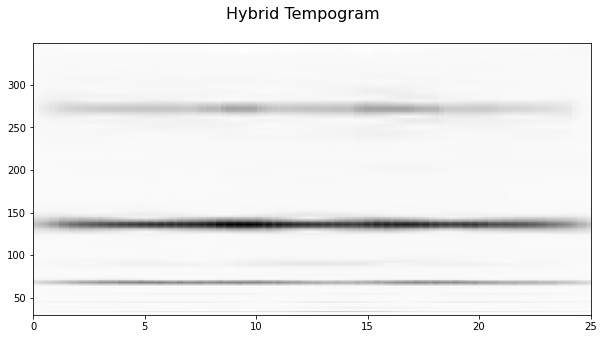

In [9]:
hT, ht, hfreqs = audio.tempogram(x=x, sr=fs, window_size_seconds=10, t_type="hybrid", theta=linear_axis)

fig, ax = utils.plot_tempogram(hT, ht, hfreqs, title="Hybrid Tempogram")

# Tempograms with nonlinear axis

# TODO: corrigir o eixo y pq ele tá linear

array([ 25.        ,  25.4369923 ,  25.8816231 ,  26.3340259 ,
        26.79433656,  27.26269332,  27.7392368 ,  28.22411012,
        28.71745887,  29.21943121,  29.73017788,  30.24985223,
        30.77861033,  31.31661097,  31.86401568,  32.42098887,
        32.98769777,  33.56431257,  34.15100642,  34.7479555 ,
        35.35533906,  35.9733395 ,  36.6021424 ,  37.24193658,
        37.89291416,  38.55527064,  39.22920489,  39.91491932,
        40.61261982,  41.32251591,  42.04482076,  42.77975128,
        43.52752816,  44.28837596,  45.06252313,  45.85020216,
        46.65164958,  47.46710605,  48.29681645,  49.14102993,
        50.        ,  50.87398461,  51.76324619,  52.6680518 ,
        53.58867313,  54.52538663,  55.4784736 ,  56.44822024,
        57.43491775,  58.43886243,  59.46035575,  60.49970446,
        61.55722067,  62.63322193,  63.72803137,  64.84197773,
        65.97539554,  67.12862514,  68.30201284,  69.49591099,
        70.71067812,  71.946679  ,  73.2042848 ,  74.48

In [132]:
# %load ../steme/utils.py
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

import steme.paths as paths

def plot_tempogram(T, t, freqs, title=None):
    figsize = (10, 5)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    kwargs = _tempogram_kwargs(t, freqs)

    ax.imshow(T, **kwargs)
    ax.set_yticks([25, 50, 100, 150, 200, 250, 300])
#     ax.set_yticks(freqs[::10])
    ax.set_xlabel("Time (s)", fontsize=16)
    ax.set_ylabel("Tempo (BPM)", fontsize=16)
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    xlim = (t[0], t[-1])
    ylim = (freqs[0], freqs[-1])

    #plt.setp(ax, xlim=xlim, ylim=ylim)

    if title is not None:
        fig.suptitle(title, fontsize=16)

    return fig, ax


def _tempogram_kwargs(t, freqs):
    kwargs = {}
    x_ext1 = (t[1] - t[0]) / 2
    x_ext2 = (t[-1] - t[-2]) / 2
    y_ext1 = (freqs[1] - freqs[0]) / 2
    y_ext2 = (freqs[-1] - freqs[-2]) / 2

    kwargs["extent"] = [t[0] - x_ext1, t[-1] +
                       x_ext2, freqs[0] - y_ext1, freqs[-1] + y_ext2]
    kwargs["cmap"] = "gray_r"
    kwargs["aspect"] = "auto"
    kwargs["origin"] = "lower"
    kwargs["interpolation"] = "nearest"

    return kwargs

In [126]:
log_axis = dataset.variables_non_linear()
log_axis = log_axis[log_axis < 350]

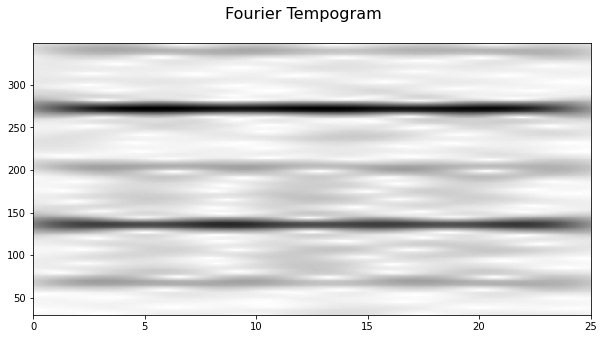

In [124]:
fT, ft, ffreqs = audio.tempogram(x=x, sr=fs, window_size_seconds=10, t_type="fourier", theta=linear_axis)

fig, ax = utils.plot_tempogram(fT, ft, ffreqs, title="Fourier Tempogram")

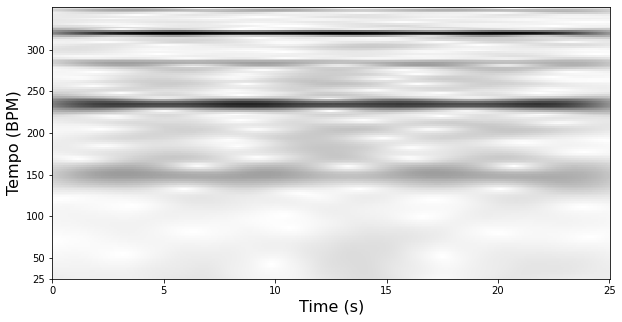

In [135]:
fT, ft, ffreqs = audio.tempogram(x=x, sr=fs, window_size_seconds=10, t_type="fourier", theta=log_axis)

fig, ax = plot_tempogram(fT, ft, ffreqs)
plt.savefig("fourier.png", format="png")

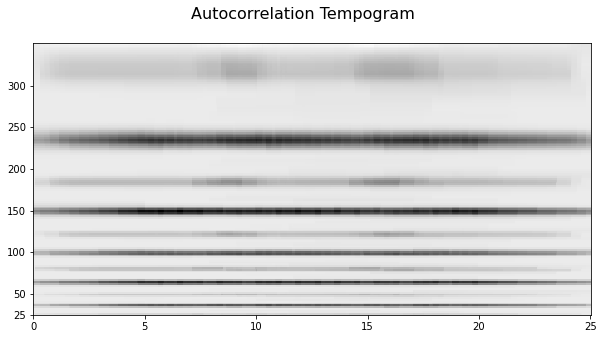

In [129]:
aT, at, afreqs = audio.tempogram(x=x, sr=fs, window_size_seconds=10, t_type="autocorrelation", theta=log_axis)

fig, ax2 = plot_tempogram(aT, at, afreqs, title="Autocorrelation Tempogram")

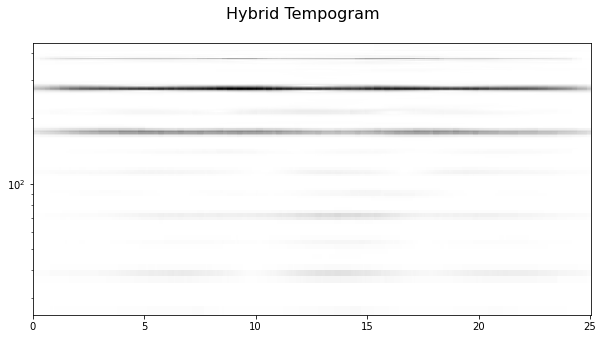

In [104]:
hT, ht, hfreqs = audio.tempogram(x=x, sr=fs, window_size_seconds=10, t_type="hybrid", theta=log_axis)

fig, ax3 = utils.plot_tempogram(hT, ht, hfreqs, title="Hybrid Tempogram")
ax3.set_yscale("log")

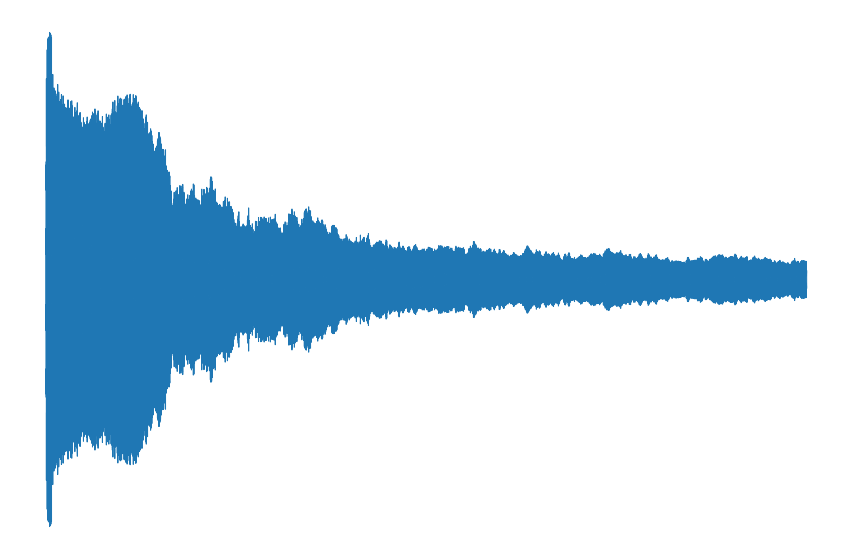

In [46]:
import librosa.display

piano, fs_p = librosa.load("../../tese/notebooks/piano_g.wav")

fig, ax = plt.subplots(1, 1, figsize=(15,10))
librosa.display.waveshow(y=piano, sr=fs_p, ax=ax)
plt.axis('off')

plt.savefig("piano_g.png", dpi='figure', format="png", metadata=None,
        bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, transparent=True
)

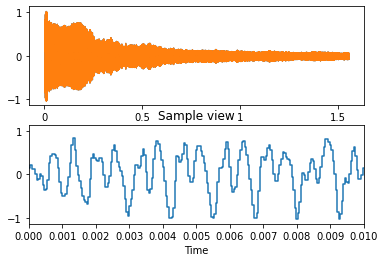

In [34]:
fig, ax = plt.subplots(2,1)
librosa.display.waveshow(y=piano, sr=fs_p, ax=ax[0])

ax[1].set(xlim=[0, 0.01], title='Sample view')
librosa.display.waveshow(y=piano, sr=fs_p, ax=ax[0])
librosa.display.waveshow(y=piano, sr=fs_p, ax=ax[1])